<a href="https://colab.research.google.com/github/TungSoPon/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_one_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [215]:
import pandas as pd

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##เอาข้อมูลเข้า

In [217]:
weather_data = pd.read_csv('/content/drive/MyDrive/DMPM/อุตุ/Group8.csv')
weather_data.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1,2011-10-05


In [218]:
data_feature = weather_data.iloc[:,4:-1]
data_feature.head()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [219]:
data_feature.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด         object
dtype: object

In [220]:
data_feature.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [221]:
#data_feature['ความเร็วลม'] = 

In [222]:
data_feature[data_feature.eq('-').any(1)==False]#หาข้อมูลที่ต้องการ

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1008.39,69,1,0,0,18.4,26.8,18.0
8165,1006.05,61,1,0,0,17.3,27.8,19.5
8166,1004.86,55,2,0,0,13.0,26.3,16.0
8167,1005.76,56,1,2,0,13.8,25.2,15.3


In [223]:
data_feature[data_feature.eq('-').any(1)]

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
305,1009.88,78,4,4,-,23.5,27.9,24.3
306,1009.47,73,2,2,-,21.9,27.5,23.7
307,1008.08,69,3,3,-,20.7,27.3,22.5
308,1008.35,72,5,5,-,21.3,27.1,22.8
309,1009.30,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...,...
8134,1011.66,72,1,-,0,15.6,23.9,15.0
8135,1011.62,73,2,-,0,15.7,23.2,15.0
8140,1015.28,74,2,1,-,15.2,22.6,-
8161,1013.57,68,1,-,0,15.2,23.2,14.0


In [224]:
f = data_feature[data_feature.eq('-').any(1)==False]

In [225]:
t = f[f.eq('T').any(1)==False]
t

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1008.39,69,1,0,0,18.4,26.8,18.0
8165,1006.05,61,1,0,0,17.3,27.8,19.5
8166,1004.86,55,2,0,0,13.0,26.3,16.0
8167,1005.76,56,1,2,0,13.8,25.2,15.3


In [226]:
t['ความเร็วลม'] = t['ความเร็วลม'].astype(float)
t['จำนวนเมฆ'] = t['จำนวนเมฆ'].astype(float)
t['ปริมาณฝน'] = t['ปริมาณฝน'].astype(float)
t['อุณหภูมิต่ำสุด'] = t['อุณหภูมิต่ำสุด'].astype(float)

<ipython-input-226-8199b53d2413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['ความเร็วลม'] = t['ความเร็วลม'].astype(float)
<ipython-input-226-8199b53d2413>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['จำนวนเมฆ'] = t['จำนวนเมฆ'].astype(float)
<ipython-input-226-8199b53d2413>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [227]:
t.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.420944,25.002667,19.933570
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.630472,2.720534,3.295887
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,11.800000,6.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,23.500000,17.900000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,25.400000,20.300000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.200000,26.900000,22.500000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,28.400000,31.000000,26.700000


In [228]:
#weather_data[weather_data['ความเร็วลม'].eq('-')]

In [229]:
#weather_data[weather_data['ความเร็วลม'].eq('-')]#eqในตารางถ้าเจอ - อันนี้เลือกมาทั้งหมด

In [230]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

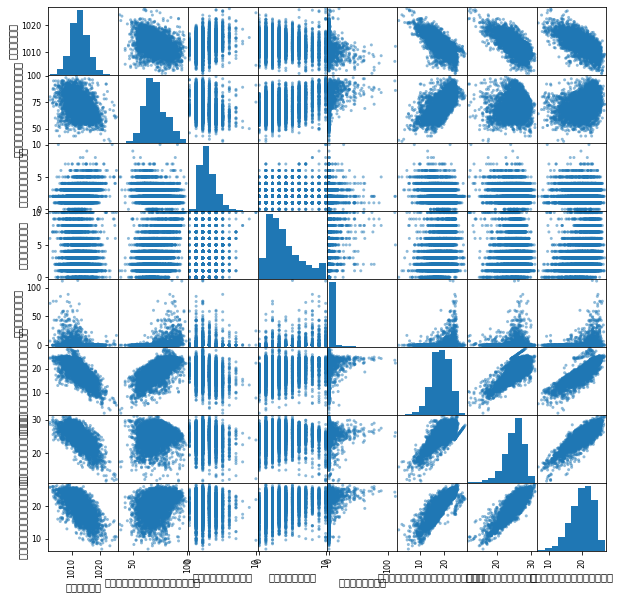

In [231]:
pd.plotting.scatter_matrix(t);

In [232]:
from matplotlib import pyplot as plt

In [233]:
from sklearn import preprocessing

In [234]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(t)
#predict-transform
data_feraures_d_s = scaler.fit_transform(t)

In [235]:
data_feraures_d_s

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.59197655,
         0.95480871,  1.47666181],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.53688186,
         0.21958617,  0.93047261],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.21958617,  0.65737801],
       ...,
       [-2.49224914, -1.63664607, -0.23542385, ..., -1.49332646,
         0.47691406, -1.19359649],
       [-2.20728764, -1.53063368, -1.06226641, ..., -1.27294767,
         0.07254167, -1.4060034 ],
       [-1.43155912, -1.31860891, -1.06226641, ..., -0.88728479,
         0.21958617, -1.19359649]])

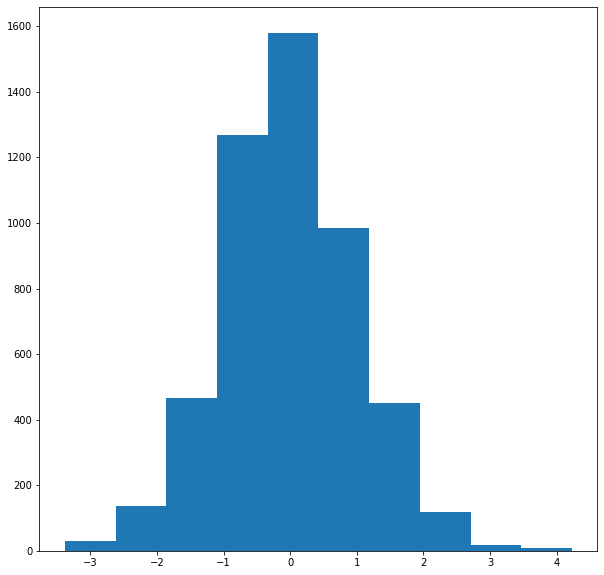

In [236]:
plt.hist(data_feraures_d_s[:,0]);

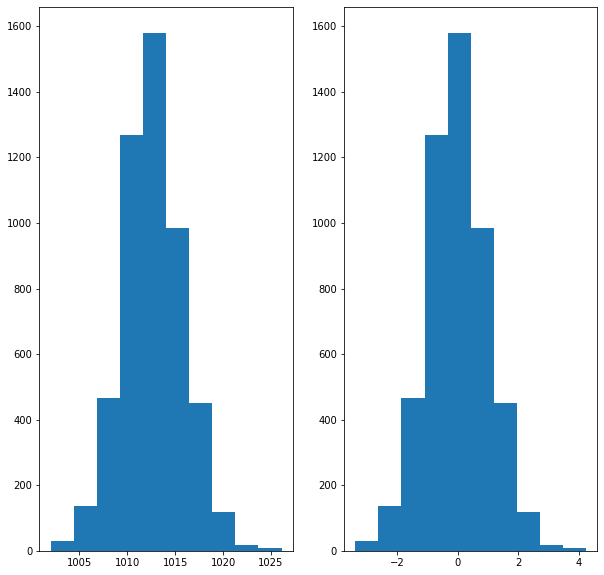

In [237]:
plt.subplot(1,2,1)
plt.hist(t['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_feraures_d_s[:,0]);

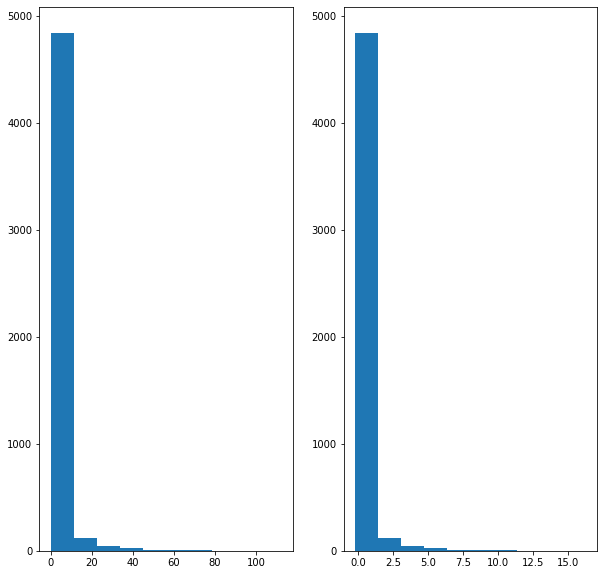

In [238]:
plt.subplot(1,2,1)
plt.hist(t['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(data_feraures_d_s[:,4]);

## Min-Max normalization

In [239]:
#define #scaler ปรับค่ามาตรฐาน
scaler = preprocessing.MinMaxScaler()
#train
scaler.fit(t)
#predict-transform
data_feraures_d_n = scaler.fit_transform(t)

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

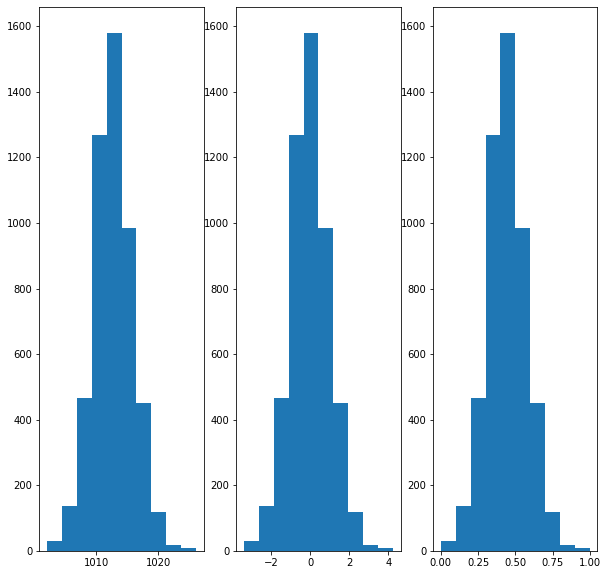

In [240]:
plt.subplot(1,3,1)
plt.hist(t['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_feraures_d_s[:,0])
plt.subplot(1,3,3)
plt.hist(data_feraures_d_n[:,0])

## Discretization
ข้อมูลบ้าน

In [241]:
home = pd.read_csv('/content/drive/MyDrive/DMPM/อุตุ/ธนภัทร_โสภณ.csv')
home.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [242]:
home_C = home.dropna(subset=['sell_price'])    

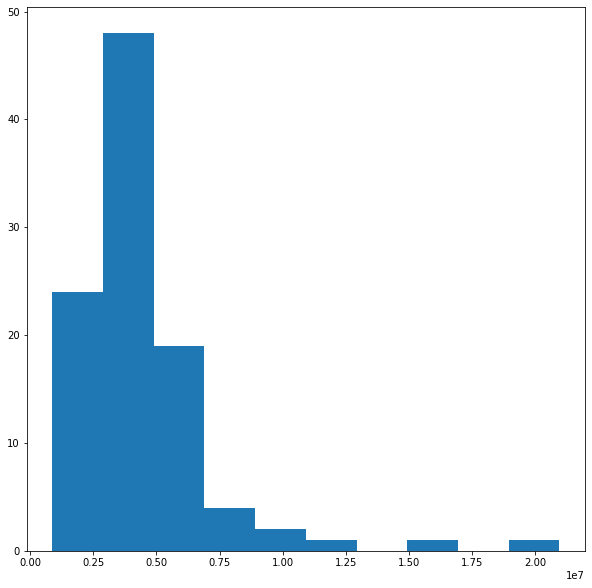

In [243]:
plt.hist(home['sell_price']);

##แปลงค่า sell_price 
#-ราคาที่ต่ำกว่า 500 k ให้เป็น 1
#-ราคาระหว่าง 500k-1ท ให้เป็น 2
#-ราคา 1m ขึ้นไปให้เป็น 3

In [244]:
import numpy as np

In [245]:
record_list = list()
for id in home['post_id']:
  print(id)

25.0
33.0
495.0
564.0
566.0
568.0
597.0
624.0
634.0
656.0
657.0
668.0
676.0
690.0
693.0
694.0
703.0
710.0
760.0
1070.0
1123.0
1128.0
1130.0
1135.0
1143.0
1149.0
1178.0
1402.0
1895.0
1915.0
1959.0
2033.0
2143.0
2244.0
2262.0
3286.0
3340.0
3357.0
3547.0
3617.0
3622.0
3721.0
3897.0
3905.0
5195.0
5978.0
5986.0
5994.0
6003.0
6007.0
6010.0
6017.0
6021.0
6022.0
6034.0
6045.0
6056.0
6069.0
7709.0
7713.0
7733.0
8514.0
8545.0
8682.0
8758.0
8950.0
9066.0
9141.0
9613.0
11264.0
12423.0
12680.0
12710.0
12759.0
13113.0
17128.0
17690.0
17754.0
17755.0
17778.0
17789.0
18092.0
18101.0
18112.0
18305.0
18629.0
18633.0
19450.0
19475.0
19478.0
19480.0
19481.0
19483.0
19492.0
19494.0
19495.0
19496.0
20164.0
31.0
570.0


In [246]:
home[home['sell_price']<500000] = 1

In [247]:
bb=list() 

In [248]:
EE = home[['sell_price']]
EE

,sell_price
0,2700000.0
1,2600000.0
2,5900000.0
3,4400000.0
4,2750000.0
...,...
95,5500000.0
96,7911000.0
97,2990000.0
98,4000000.0


In [279]:
n = EE[EE['sell_price']<=5000000]

In [271]:
n.iloc[0:76]=1

In [272]:
n

,sell_price
0,1.0
1,1.0
3,1.0
4,1.0
9,1.0
...,...
92,1.0
93,1.0
97,1.0
98,1.0


In [277]:
home['new'] = n['sell_price']

In [278]:
home

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,new
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1.0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1.0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,NaN
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1.0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14,NaN
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,NaN
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9,1.0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4,1.0


In [262]:
qq

,sell_price
19,1.0
20,905000.0


In [259]:
qq.replace(1, value=1)

,sell_price
19,880000.0
20,905000.0


In [251]:
bb

[]

In [280]:
home

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,new
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1.0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1.0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,NaN
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1.0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14,NaN
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,NaN
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9,1.0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4,1.0


##ดัมมี่

In [281]:
home_DM = pd.get_dummies(home,columns=['zone'])

In [282]:
home_DM

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
